In [2]:
# Import modules
import pandas as pd
import mysql.connector
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Connect to database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="SadikaSydney99",
  database="insertion_pro",
  auth_plugin='mysql_native_password'
)
mycursor = mydb.cursor()

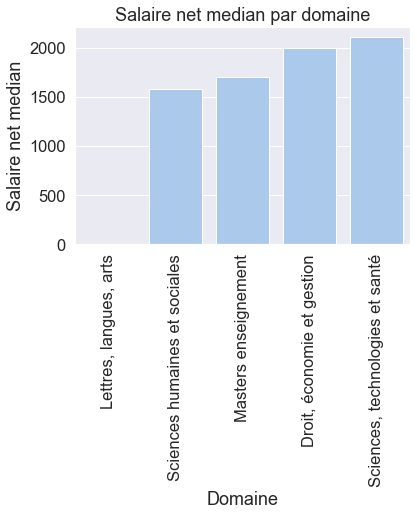

In [4]:
# Afficher le salaire net median par Domaine
sql = "SELECT distinct salaire_net_median_des_emplois_a_temps_plein, nom_domaine from Statistiques join Discipline on Statistiques.id_discipline = Discipline.id_discipline join Domaine on discipline.code_domaine = Domaine.code_domaine group by discipline.code_domaine"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

domaine = df[1]
salaire = df[0]

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= domaine, y= salaire, color="b")
plt.xlabel('Domaine')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par domaine")
plt.xticks(rotation=90)
plt.show()

In [5]:
df

,0,1
0,NaN,"Lettres, langues, arts"
1,1580.0,Sciences humaines et sociales
2,1700.0,Masters enseignement
3,2000.0,"Droit, économie et gestion"
4,2110.0,"Sciences, technologies et santé"


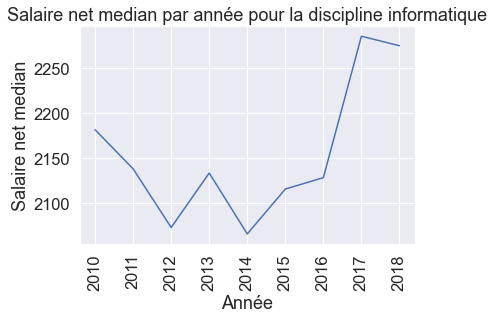

In [6]:
# afficher la moyenne du salaire_net_median_des_emplois_a_temps_plein par année pour la discipline 'Informatique'
sql = "select annee, avg(salaire_net_median_des_emplois_a_temps_plein) from enquete join statistiques using (annee, situation, diplome) join discipline on statistiques.id_discipline = discipline.id_discipline where nom_discipline='informatique' GROUP BY annee;"

mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

annees = df[0]
salaire = df[1]

sns.set_theme(style="darkgrid")
# Visualiser les données
sns.set(font_scale=1.5)
sns.lineplot(x= annees, y= salaire)
plt.xlabel('Année')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par année pour la discipline informatique")
plt.xticks(rotation=90)
plt.show()

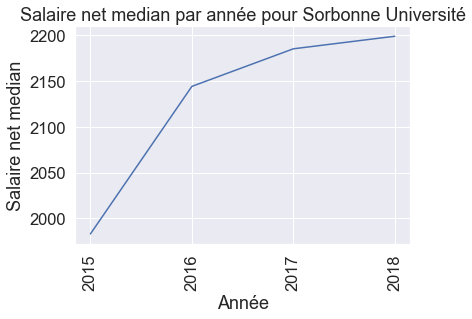

In [7]:
# Afficher l'évolution du salaire net median par année pour l'université de piérre et marie curie
sql = "select annee, avg(salaire_net_median_des_emplois_a_temps_plein) from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement where nom_etablissement='Sorbonne Université' or nom_etablissement_actuel ='Sorbonne Université' GROUP BY annee;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[1])
plt.xlabel('Année')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par année pour Sorbonne Université")
plt.xticks(rotation=90)
plt.show()

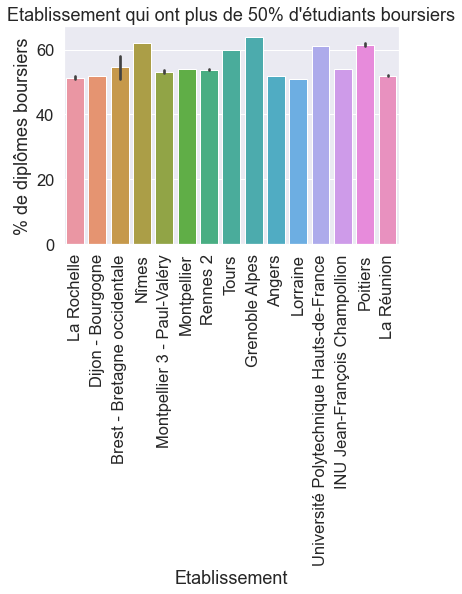

In [8]:
# Afficher les etablissement qui ont plus de 50% d'étudiants boursiers
sql = "select nom_etablissement , de_diplomes_boursiers from etablissement join statistiques using (id_etablissement) where de_diplomes_boursiers > 50;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Etablissement')
plt.ylabel('% de diplômes boursiers')
plt.title("Etablissement qui ont plus de 50% d'étudiants boursiers")
plt.xticks(rotation=90)
plt.show()

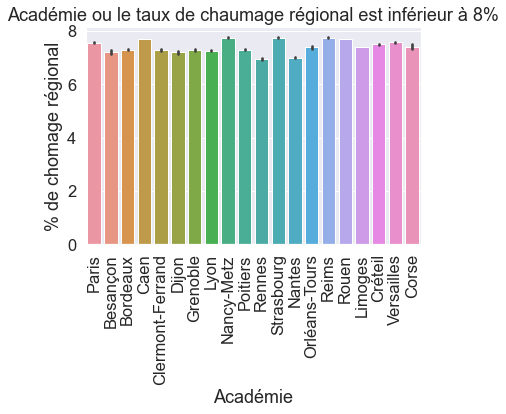

In [9]:
# Afficher les académies ou le taux de chaumage regionel est inférieur à 8%
sql = "select nom_academie, taux_de_chomage_regional from academie join etablissement using (id_academie) join statistiques using (id_etablissement) where taux_de_chomage_regional < 8;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Académie')
plt.ylabel('% de chomage régional')
plt.title("Académie ou le taux de chaumage régional est inférieur à 8%")
plt.xticks(rotation=90)
plt.show()

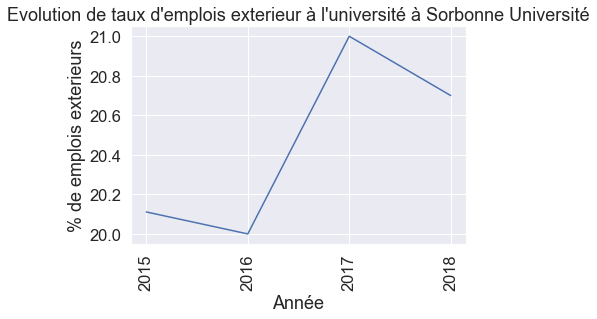

In [10]:
# Afficher l'evolution de taux d'mplois exterieur à l'université à Sorbonne Université
sql = "select annee, avg(emplois_exterieurs_a_la_region_de_luniversite) from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement where nom_etablissement='Sorbonne Université' or nom_etablissement_actuel ='Sorbonne Université' GROUP BY annee;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[1])
plt.xlabel('Année')
plt.ylabel('% de emplois exterieurs')
plt.title("Evolution de taux d'emplois exterieur à l'université à Sorbonne Université")
plt.xticks(rotation=90)
plt.show()


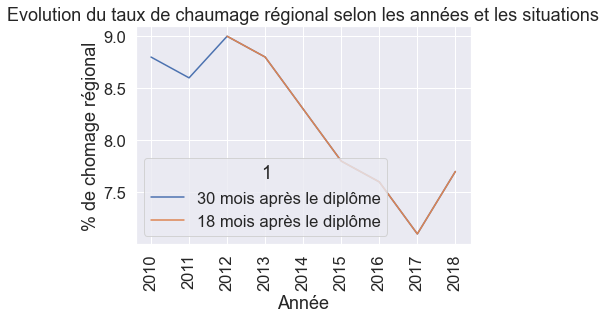

In [11]:
# Afficher l'evolution du taux de chaumage régional  selon les années et les situations
sql = "select annee, situation, taux_de_chomage_regional from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement GROUP BY annee, situation;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[2], hue= df[1])
plt.xlabel('Année')
plt.ylabel('% de chomage régional')
plt.title("Evolution du taux de chaumage régional selon les années et les situations")
plt.xticks(rotation=90)
plt.show()

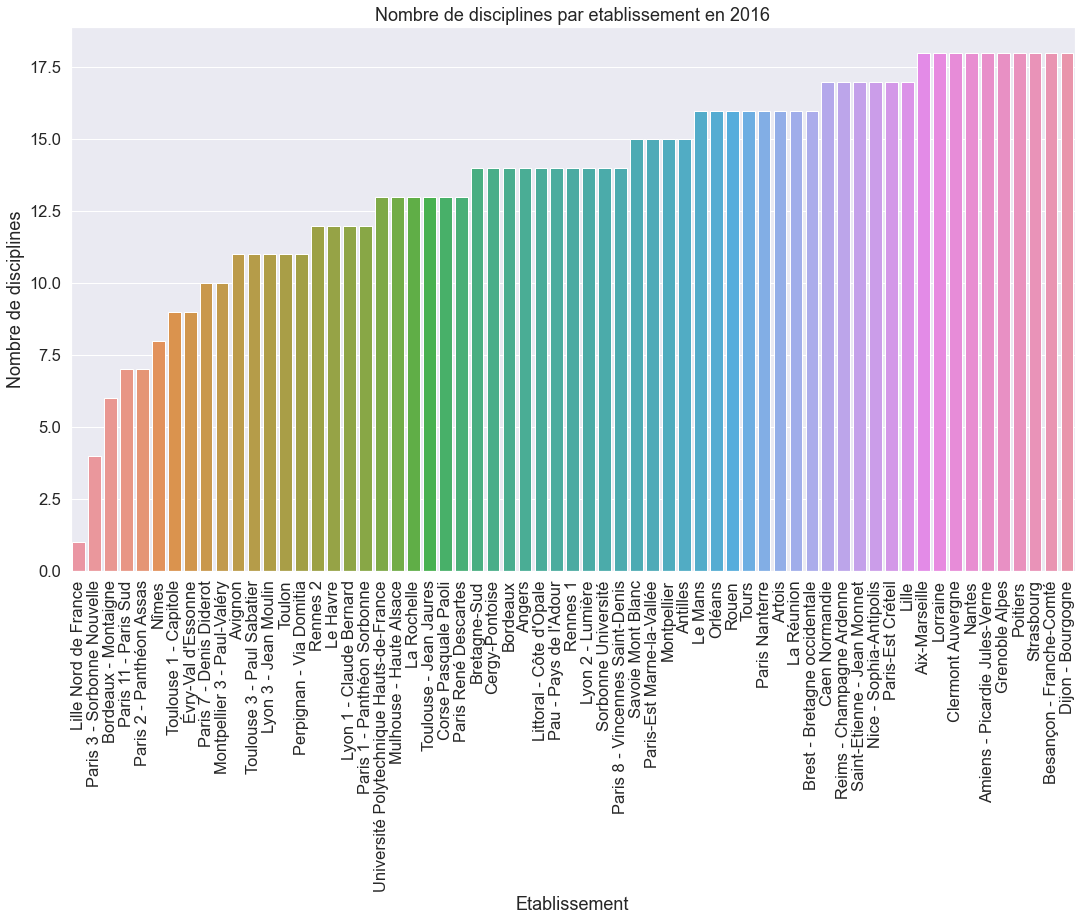

In [12]:
#Affichier le nombre de disciplines par etablissement en 2016
sql = "select nom_etablissement, count(id_discipline) l from etablissement join statistiques using (id_etablissement) join discipline using(id_discipline) where annee = 2016 and situation ='30 mois après le diplôme' GROUP BY nom_etablissement order by l;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)
plt.figure(figsize=(18,10))
# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Etablissement')
plt.ylabel('Nombre de disciplines')
plt.title("Nombre de disciplines par etablissement en 2016")
plt.xticks(rotation=90)
plt.show()


In [13]:
#-- afficher la moyenne du salaire_net_median_des_emplois_a_temps_plein par année pour pour tout les noms des disciplines
mycursor.execute("select annee, avg(salaire_net_median_des_emplois_a_temps_plein), nom_discipline from enquete join statistiques using (annee, situation, diplome) join discipline on statistiques.id_discipline = discipline.id_discipline  GROUP BY annee, nom_discipline")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

df.columns = ['annee', 'salaire_net_median_des_emplois_a_temps_plein', 'nom_discipline']
df

,annee,salaire_net_median_des_emplois_a_temps_plein,nom_discipline
0,2010,1952.941176,"Ensemble formations juridiques, économiques et..."
1,2011,1942.641509,"Ensemble formations juridiques, économiques et..."
2,2012,1866.728972,"Ensemble formations juridiques, économiques et..."
3,2013,1873.551402,"Ensemble formations juridiques, économiques et..."
4,2014,1905.094340,"Ensemble formations juridiques, économiques et..."
...,...,...,...
158,2016,1834.459459,Masters enseignement
159,2017,1779.682540,Masters enseignement
160,2018,1780.588235,Masters enseignement
161,2011,1651.111111,Masters enseignement : premier degré


In [19]:
# Affichage du salaire_net_median_des_emplois_a_temps_plein le plus élevé et le nom de  discpline correspondante et  le nom de l'établissement
mycursor.execute("select max(salaire_net_median_des_emplois_a_temps_plein), nom_etablissement, nom_discipline from statistiques join discipline on statistiques.id_discipline = discipline.id_discipline join etablissement on statistiques.id_etablissement = etablissement.id_etablissement")
myresult = mycursor.fetchall()
# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)
df.columns = ['salaire_net_median_des_emplois_a_temps_plein', 'nom_etablissement', 'nom_discipline']
df


,salaire_net_median_des_emplois_a_temps_plein,nom_etablissement,nom_discipline
0,3150.0,Nice - Sophia-Antipolis,"Masters enseignement : second degré, CPE..."


In [18]:
# Affichage des moyenne salaire_net_mensuel_median_regional et de nom_académie correspondante par ordre décroissant en éliminant les doublons
mycursor.execute("select distinct nom_academie , avg(salaire_net_mensuel_median_regional) as moy from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie group by nom_academie having moy is not null ")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df



,0,1
0,Paris,2054.7160
1,Aix-Marseille,1815.6540
2,Besançon,1780.9408
3,Bordeaux,1738.0612
4,Caen,1790.0366
5,Clermont-Ferrand,1793.3533
6,Dijon,1781.5571
7,Grenoble,1814.1638
8,Lille,1814.1491
9,Lyon,1821.5838


In [20]:
# Affichage le taux_insertion par academie
mycursor.execute("select distinct taux_dinsertion, nom_academie from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie ORDER BY taux_dinsertion DESC")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

,0,1
0,100.0,Paris
1,100.0,Aix-Marseille
2,100.0,Besançon
3,100.0,Bordeaux
4,100.0,Caen
...,...,...
837,NaN,Créteil
838,NaN,Versailles
839,NaN,Corse
840,NaN,La Réunion


In [21]:
# Affichage de toutes les université qui ont changé de nom
mycursor.execute("select distinct nom_etablissement, nom_etablissement_actuel from etablissement where nom_etablissement_actuel IS NOT NULL")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

,0,1
0,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA)
1,Bordeaux 1 - Sciences technologies,Université de Bordeaux
2,Bordeaux 2 - Victor Segalen,Université de Bordeaux
3,Bordeaux 4 - Montesquieu,Université de Bordeaux
4,Montpellier 1,Université de Montpellier
5,Montpellier 2 - Sciences techniques du Languedoc,Université de Montpellier
6,Grenoble 1 - Joseph Fourier,Université Grenoble Alpes (UGA)
7,Grenoble 2 - Pierre Mendès France,Université Grenoble Alpes (UGA)
8,Grenoble 3 - Stendhal,Université Grenoble Alpes (UGA)
9,Grenoble Alpes,Université Grenoble Alpes (UGA)


In [22]:

#afficher le taux_chaomge_regional par academie
mycursor.execute("select distinct taux_de_chomage_regional, nom_academie from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie where taux_de_chomage_regional is Not NULL ORDER BY taux_de_chomage_regional DESC")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

,0,1
0,20.1,La Réunion
1,19.4,Guadeloupe
2,17.4,La Réunion
3,14.3,Montpellier
4,14.0,Lille
...,...,...
208,6.7,Rennes
209,6.7,Nantes
210,6.6,Besançon
211,6.6,Dijon


In [24]:
#afficher l'année la plus récentede l'enquete la plus récente
mycursor.execute("select distinct annee from statistiques order by annee desc limit 1")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

,0
0,2018


In [23]:
# afficher les etablissement ayant les emplois stables les plus elevé 
mycursor.execute("select sum(emplois_stables), nom_etablissement from statistiques join etablissement GROUP BY nom_etablissement ORDER BY sum(emplois_stables) DESC ")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df


,0,1
0,523640.0,La Réunion
1,523640.0,Antilles
2,523640.0,Corse Pasquale Paoli
3,523640.0,Cergy-Pontoise
4,523640.0,Paris-Est Créteil
...,...,...
80,523640.0,La Rochelle
81,523640.0,Caen Normandie
82,523640.0,Aix-Marseille
83,523640.0,Université de technologie de Troyes


In [30]:
#afficher toutes les informations de l'établissement dont le nom est "Pierre et Marie Curie" en utilisant un JOIN avec la table etablissement
mycursor.execute("select distinct * from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement where etablissement.nom_etablissement = 'Pierre et Marie Curie'")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df


""
